# toy problem 2

## Generate data

train_data size (100,500,128,128)

validation size (10,500,128,128)

test size (10,500,128,128)

In [1]:
import os
# import sys
import numpy as np
# import scipy as sp
# from scipy import integrate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# import torch

# module_path = os.path.abspath(os.path.join('../src/'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
    
# import utils

In [2]:
def make_data(n_points, file_name, data_dir = './data/toy2', n_time_steps = 500, dim = 128, num_periods_big = 8, w0=0.5, w1=1.0, width_small = 64):
    """
    Makes data for toy2a
    
    Inputs:
    n_points: int, how many data points 
    file_name: str, name of file to save
    data_dir = './data/toy2': str, directory of where to store
    n_time_steps = 500: int, how many time steps per data point
    dim = 128: int, how many data points per dim, while be same in both x and y directions
    num_periods_big = 8: int, how many periods of the slow scale
    w0 = 0.5: float, frequency of slow scale
    w1 = 1.0: float, frequency of fast scale
    width_small = 8: width of small (fast) scale
    
    Output: 
    data: size (n_points,n_time_steps,dim, dim) will be returned and saved to file data_dir+file_name
    
    """
    print(width_small)
    print("Making data")
    x = np.arange(dim)
    y = np.arange(dim)
    data = np.zeros((n_points, n_time_steps, dim, dim))

    for i in tqdm(range(n_points)):
        t_start = np.random.uniform(high=4*np.pi)
        t = np.linspace(t_start, num_periods_big*4*np.pi + t_start, n_time_steps)


        xgrid, ygrid, tgrid = np.meshgrid(x, y, t)

        Phi = np.cos(w0*tgrid)

        Phi[:width_small, :width_small,:] = np.cos(w1*tgrid[:width_small, :width_small,:]+np.pi/4)
        scaled_Phi = (Phi.T - Phi.min()) / (Phi.max() - Phi.min())
        data[i] = scaled_Phi

    print("making done, saving to ", os.path.join(data_dir, file_name))
    np.save(os.path.join(data_dir, file_name), data)
    print("done")
    
    return data

4
Making data


  0%|          | 0/100 [00:00<?, ?it/s]

making done, saving to  ../data/toy2a/train_data.npy
done
(100, 500, 8, 8)


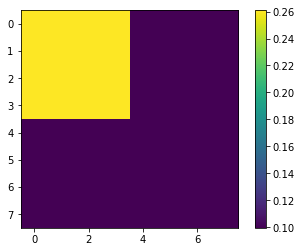

4
Making data


  0%|          | 0/10 [00:00<?, ?it/s]

making done, saving to  ../data/toy2a/val_data.npy
done
4
Making data


  0%|          | 0/10 [00:00<?, ?it/s]

making done, saving to  ../data/toy2a/test_data.npy
done


In [3]:
n_train_points = 100
n_val_points = 10
n_test_points = 10
n_time_steps = 500
dim = 8
width_small = int(dim/2)

# params
w0 = 0.5
w1 = 1.0
# width_small = 8
num_periods_big = 8


# paths
data_dir = '../data/toy2a'
result_dir = '../result/toy2a'


x = np.arange(dim)
y = np.arange(dim)
train_data = make_data(n_train_points, 'train_data.npy', data_dir = data_dir,width_small=width_small,dim=dim) 
print(train_data.shape)
plt.imshow(train_data[0,0])
plt.colorbar()
plt.show()
val_data = make_data(n_val_points, 'val_data.npy', data_dir = data_dir,width_small=width_small,dim=dim) 
test_data = make_data(n_test_points, 'test_data.npy', data_dir=data_dir,width_small=width_small,dim=dim) 



(100, 500, 8, 8)


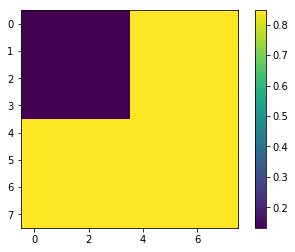

In [4]:
print(train_data.shape)
plt.imshow(train_data[2,0])
plt.colorbar()

In [5]:
def animate(snapshots, normalize = True, file_name = "animation.gif"):
    """
    Makes an animation of snapshots in time
    
    inputs:
    snapshots: np.array of size (n_time_steps,1, dim, dim)
    normalize = True: whether to fix axis between 0 and 1 or not
    file_name = "animation.gif": file name of where to save gif
    
    outputs:
    no returned output
    gif saved to file_name
    """


    fps = 30
    nSeconds = len(snapshots)/fps
    
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure( figsize=(8,8) )

    a = snapshots[0,:,:,:][0].T
    if normalize:
        im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0.0, vmax=1.0)
    else:
        im = plt.imshow(a, interpolation='none', aspect='auto', vmin=np.min(snapshots), vmax=np.max(snapshots))
    plt.colorbar()

    print("Animating, may take a little while...")

    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )

        im.set_array(snapshots[i,:,:,:,][0].T)
        return [im]

    anim = animation.FuncAnimation(
                                   fig,
                                   animate_func,
                                   frames = int(nSeconds * fps),
                                   interval = 1000 / fps, # in ms
                                   )
    writergif = animation.PillowWriter(fps=30)
    anim.save(file_name, writer=writergif)

    print('Done! gif saved to ', file_name)


Animating, may take a little while...
..................Done! gif saved to  ../result/toy2a/train_data.gif


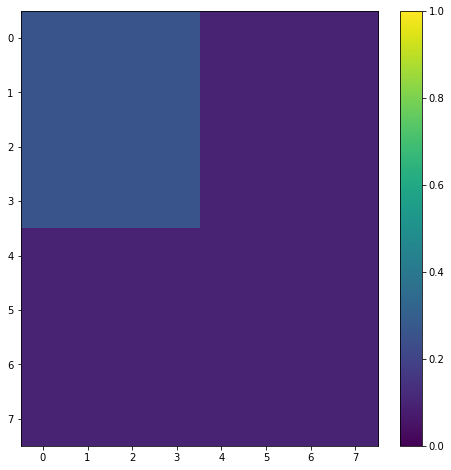

In [6]:
animate(train_data[0].reshape(n_time_steps,1, dim, dim), file_name = os.path.join(result_dir,'train_data.gif'))